## Preprocess:

In [1]:
import scipy as sp
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
images = []
imagePath = "/Users/elifatilsin/Desktop/adsız klasör 5/afhq_dog"
for file in os.listdir(imagePath):
    image = imagePath + "/" + file
    image2 = Image.open(image).resize((64,64), Image.BILINEAR)
    data = np.asfarray(image2).reshape((4096,3))
    images.append(data)

images = np.array(images, dtype = object)
images.shape    

(5239, 4096, 3)

In [3]:
X1=images[:,:,0].astype(np.float32)
X2=images[:,:,1].astype(np.float32)
X3=images[:,:,2].astype(np.float32)

In [15]:
class PCA:
    def PCA_calc(self, X):
        X= X-X.mean() 
        covMatrix = np.cov(X,bias=False,rowvar=False) 
        eig = np.linalg.eig(covMatrix)
        eigenvalues = eig[0] 
        eigenvectors = eig[1] 
        sorted_eigenvalues = sorted(eigenvalues, reverse = True)
        sorted_eigenvectors = [x for _,x in sorted(zip(eigenvalues, eigenvectors), reverse = True)] 
        return(sorted_eigenvalues, sorted_eigenvectors)
    
    def graph(self, eigenvalues, color = "B"):
        sum_of_eigenvalues = np.sum(eigenvalues)
        proportions = eigenvalues/sum_of_eigenvalues
        
        t = np.arange(1, 5240, 1)
        fig= plt.figure() 
        plt.plot(t[:10], proportions[:10],marker='*',color=color)
        plt.title('Explained Variance by Top 10 Eigenvectors (' + color +')' ) 
        plt.xlabel('Eigenvector (Principle Components)')
        plt.ylabel('PVE')
        plt.xticks(t[:10])
        plt.show()
        DF = pd.DataFrame(proportions[:10].astype(np.float32),index=t[:10],columns=['PVE'])
        print(DF)
        sum_of_PVE_10 = np.sum(proportions[:10])
        print('Total PVE for top 10 eigenvalues: ',float(sum_of_PVE_10))
        
        sum_variance2 = []
        for j in range(len(eigenvalues)):
            add2 = np.sum(proportions[:j+1])
            sum_variance2.append(add2)
            
            if sum_variance2[-1]>0.7:
                break
            
        print("Required component amount for 70% variance:", len(sum_variance2)) 

    def red(self, eigenvector, image, k):
        image_ = image.resize((64,64), Image.BILINEAR)
        xx = np.asfarray(image_).reshape((4096,3))
        red_original = xx[:,0].astype(np.float32)
        sub_red = np.dot(eigenvector[:k], red_original - red_original.mean())
        data_original_red = np.dot(eigenvector[:k].T, sub_red) + red_original.mean()
        data_original2_red = np.reshape(data_original_red, (64,64))
        redd = Image.fromarray(np.uint8(data_original2_red))
        return redd
        
    def green(self, eigenvector, image, k):
        image_ = image.resize((64,64), Image.BILINEAR)
        xx = np.asfarray(image_).reshape((4096,3))
        
        red_original = xx[:,1].astype(np.float32)
        sub_red = np.dot(eigenvector[:k], red_original - red_original.mean())
        data_original_red = np.dot(eigenvector[:k].T, sub_red) + red_original.mean()
        data_original2_red = np.reshape(data_original_red, (64,64))
        redd = Image.fromarray(np.uint8(data_original2_red))
        return redd
    
    def blue(self, eigenvector, image, k):
        image_ = image.resize((64,64), Image.BILINEAR)
        xx = np.asfarray(image_).reshape((4096,3))
        red_original = xx[:,2].astype(np.float32)
        sub_red = np.dot(eigenvector[:k], red_original - red_original.mean())
        data_original_red = np.dot(eigenvector[:k].T, sub_red) + red_original.mean()
        data_original2_red = np.reshape(data_original_red, (64,64))
        redd = Image.fromarray(np.uint8(data_original2_red))
        return redd
    
    def mergee(self, redd, greenn, bluee):
        merged = Image.merge('RGB',(redd, greenn, bluee))
        merged.save('Compressed_photo.png')
        merged.show()
pca = PCA()

## Question 1.1

In [5]:
eigenvalues1, eigenvectors1 = pca.PCA_calc(X1) # For red.
eigenvalues2, eigenvectors2 = pca.PCA_calc(X2) # For green
eigenvalues3, eigenvectors3 = pca.PCA_calc(X3) # For blue.

PCA for Red


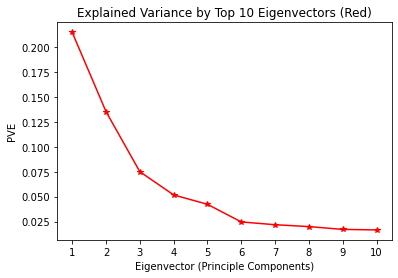

         PVE
1   0.215068
2   0.135421
3   0.075041
4   0.051726
5   0.042286
6   0.024580
7   0.021770
8   0.019897
9   0.017070
10  0.016558
Total PVE for top 10 eigenvalues:  0.6194178151855934
Required component amount for 70% variance: 18


In [6]:
print('PCA for Red')
pca.graph(eigenvalues1, color = "Red")

PCA for Green


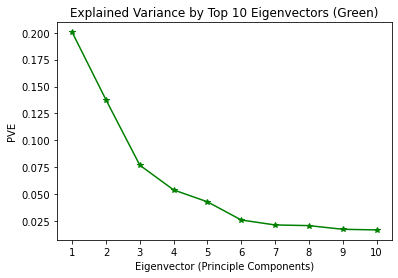

         PVE
1   0.200454
2   0.137676
3   0.076952
4   0.053970
5   0.042918
6   0.026022
7   0.021426
8   0.020812
9   0.017393
10  0.016811
Total PVE for top 10 eigenvalues:  0.6144337496251132
Required component amount for 70% variance: 19


In [8]:
print('PCA for Green')
pca.graph(eigenvalues2, color = "Green")

PCA for Blue


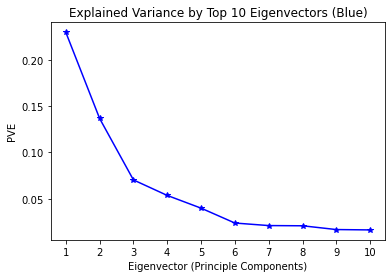

         PVE
1   0.229946
2   0.136770
3   0.070332
4   0.053559
5   0.039817
6   0.023731
7   0.020990
8   0.020757
9   0.016680
10  0.016291
Total PVE for top 10 eigenvalues:  0.6288728026196491
Required component amount for 70% variance: 17


In [10]:
print('PCA for Blue')
pca.graph(eigenvalues3, color = "Blue")

## Question 1.2

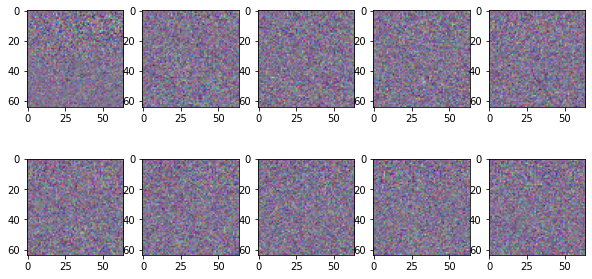

In [53]:
eig1_ar = np.array(eigenvectors1[:10]).reshape(10,64,64)
eig2_ar = np.array(eigenvectors2[:10]).reshape(10,64,64)
eig3_ar = np.array(eigenvectors3[:10]).reshape(10,64,64)

red_normalized = (eig1_ar-eig1_ar.min()) / (eig1_ar.max()-eig1_ar.min())
green_normalized = (eig2_ar-eig2_ar.min()) / (eig2_ar.max()-eig2_ar.min())
blue_normalized = (eig3_ar-eig3_ar.min()) / (eig3_ar.max()-eig3_ar.min())

R_G_B = np.stack((red_normalized,green_normalized,blue_normalized ), axis = -1)
fig = plt.figure(figsize=(10,5))
cols =5
rows =2
for i in range(0,10):
    eig_visual =R_G_B[i]
    fig.add_subplot(rows,cols,i+1)
    plt.imshow(eig_visual)
plt.show()

## Question 1.3

In [51]:
# spesificied image:
im = Image.open(r"/Users/elifatilsin/Desktop/adsız klasör 5/afhq_dog/flickr_dog_000002.jpg") 

In [52]:
# calculations for red:
i = int(input("Please enter i from ks: ks = [1, 50, 250, 500, 1000, 4096]: "))
red = pca.red(np.array(eigenvectors1), im, i)
green = pca.green(np.array(eigenvectors2), im, i)
blue = pca.blue(np.array(eigenvectors3), im, i)
pca.mergee(red, green, blue)

Please enter i from ks: ks = [1, 50, 250, 500, 1000, 4096]: 4096
